In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,lfilter,freqz

In [41]:
fs = int(input("Enter the sampling rate in Hz: "))
f1 = int(input("Enter first frequency in Hz: "))
f2 = int(input("Enter second frequency in Hz:"))
f3 = int(input("Enter third frequency in Hz:"))

Enter the sampling rate in Hz: 100
Enter first frequency in Hz: 5
Enter second frequency in Hz:15
Enter third frequency in Hz:30


In [42]:
time = np.arange(0,1,1/fs)
s= np.sin(2*np.pi*f1*time)+np.sin(2*np.pi*f2*time)+np.sin(2*np.pi*f3*time)

In [43]:
def butter_stopband_filter(data,lowcut,highcut,fs,order=4):
    nyquist= 0.5*fs
    low = lowcut/nyquist
    high = highcut/nyquist
    b,a = butter(order,[low,high],btype='bandpass')
    y= lfilter(b,a,data )
    return y

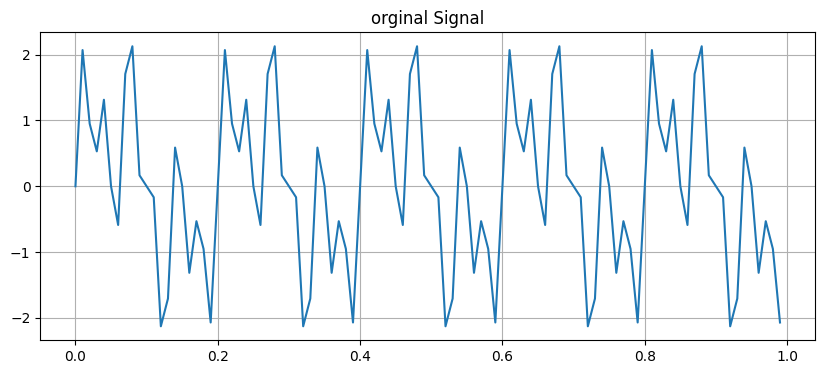

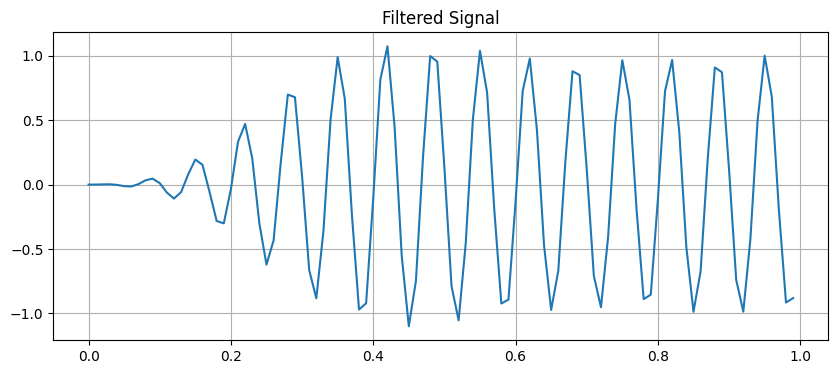

In [44]:

plt.figure(figsize=(10,4))
plt.plot(time,s)
plt.title('orginal Signal')
plt.grid()
plt.show()

filtered_signal= butter_stopband_filter(s,13,17,fs )

plt.figure(figsize=(10,4))
plt.plot(time,filtered_signal)
plt.title('Filtered Signal')
plt.grid()
plt.show()
plt.show()

In [45]:
#fft or dft calculation
X_mag = np.fft.fft(filtered_signal)
X_freq = np.fft.fftfreq(len(X_mag), 1/fs)
magnitude = np.abs(X_mag)/len(X_mag)

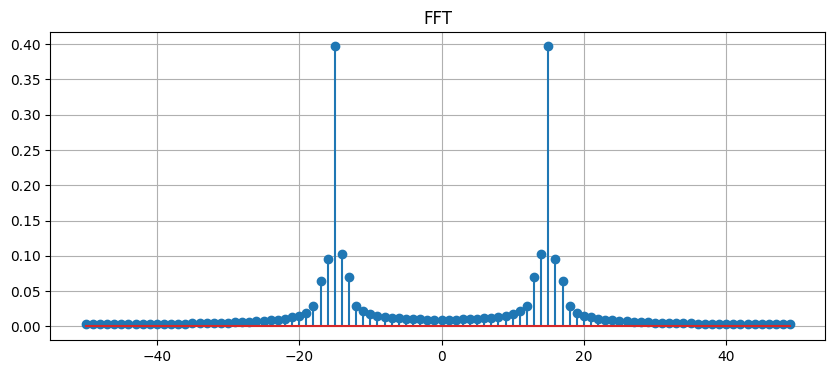

In [46]:
plt.figure(figsize=(10,4))
plt.stem(X_freq,magnitude)
plt.title('FFT')
plt.grid()
plt.show()